# MSci Working Notes
## Week 1 
### Discrete-Continuum Correspondence

In [2]:
#Import libraries
import numpy as np
import random 
import matplotlib.pyplot as plt
from itertools import permutations, combinations

# Task 1
 - Generate random points $(x,t)$ in 2D-minkowski space to produce causal sets.
 - Sprinkle $N$ points, where $N$ chosen from Gaussian with mean $<N>$.
 - Make links between points based on whether causal connections present or not

## Sprinkling
 - Choose finite region of spacetime in which to sprinkle elements to be $(x,t) = [[-1,1],[-1,1]]$
 - In this way, across many iterations, we are sprinkling at constant density $\rho$:
\begin{align}
\rho = \frac{<N>}{\text{2-volume}}
\end{align}

- In this case we use the '2-volume' (=4), because we are only working in 2 dimensions

9


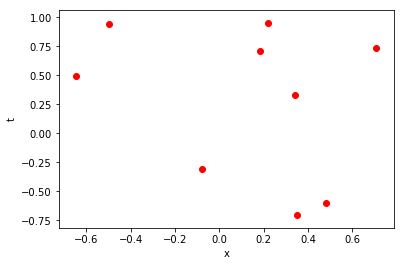

In [15]:
#Choose finite region of spacetime in which to sprinkle to be (x, t) = [[-1,1],[-1,1]]
N_mean = 10
N = int(np.random.normal(N_mean,0.1*N_mean))
print N
x = [random.uniform(-1,1) for i in range(N)]
t = [random.uniform(-1,1) for i in range(N)]

plt.figure()
[plt.scatter(x[i],t[i],color='r') for i in range(N)]
plt.xlabel('x')
plt.ylabel('t')
plt.show()

### Building causal set relations
 - We connect two elements in a causal set if they lie within eachother's light cones, i.e. they are causally related.
 - Function below takes two spacetime coordinates and returns T/F for the existence of a causal relation.
 - If $\Delta x < \Delta t$: elements are causally related.

In [36]:
def is_connected(coord1, coord2):
    if np.abs(coord1[0]-coord2[0]) < np.abs(coord1[1] - coord2[1]):
        return True
    else:
        return False

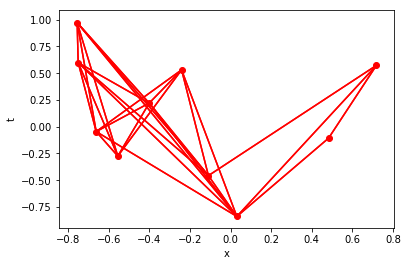

In [37]:
elements = zip(x,t)
element_pairs = list(permutations(elements,r=2))
connections = [is_connected(i[0],i[1]) for i in element_pairs]
plt.figure()
[plt.scatter(x[i],t[i],color='r') for i in range(N)]
for i in range(len(element_pairs)):
    if connections[i]:
        plt.plot([j[0] for j in element_pairs[i]], [j[1] for j in element_pairs[i]],color='r')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# Task 2
 - Generate random points $(u,v)$ in 2D-minkowski space to produce causal sets.
 - Essentially the same process as above, but this time in different coordinates defined as:
 
\begin{align}
u = \frac{1}{\sqrt{2}} (x + t)
\end{align}

\begin{align}
u = \frac{1}{\sqrt{2}} (t - x)
\end{align}

 - Sprinkle $N$ points, where $N$ chosen from Gaussian with mean $<N>$.
 - Make links between points based on whether causal connections present or not

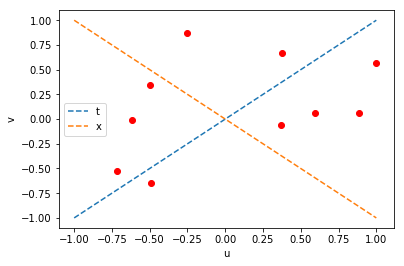

In [35]:
N = 10
u = [random.uniform(-1,1) for i in range(N)]
v = [random.uniform(-1,1) for i in range(N)]

plt.figure()
[plt.scatter(u[i],v[i],color='r') for i in range(N)]
plt.plot(np.linspace(-1,1,10),np.linspace(-1,1,10),'--',label='t')
plt.plot(np.linspace(-1,1,10),-1*np.linspace(-1,1,10),'--',label='x')
plt.xlabel('u')
plt.ylabel('v')
plt.legend()
plt.show()

### Building causal set relations
 - We connect two elements in a causal set if they lie within eachother's light cones, i.e. they are causally related.
 - Function below takes two spacetime coordinates and returns T/F for the existence of a causal relation.
 - If $u_{1} < u_{2}$ and $v_{1} < v_{2}$, elements are related

In [19]:
def is_connected2(coord1,coord2):
    if coord1[0] < coord2[0] and coord1[1] < coord2[1]:
        return True
    else:
        return False

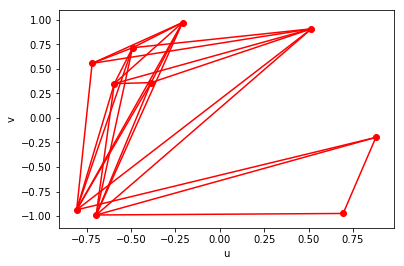

In [20]:
elements = zip(u,v)
element_pairs = list(permutations(elements,r=2))
connections = [is_connected2(i[0],i[1]) for i in element_pairs]
plt.figure()
[plt.scatter(u[i],v[i],color='r') for i in range(N)]
for i in range(len(element_pairs)):
    if connections[i]:
        plt.plot([j[0] for j in element_pairs[i]], [j[1] for j in element_pairs[i]],color='r')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

# Task 3
### Lorentz Boosts
 - Consider what happens to points under Lorentz Transformations, particularly in the limit that $v \to 1$.
 
\begin{align}
(x,t) \to (x\prime,t\prime)
\end{align}

\begin{align}
x\prime = \gamma (t-vx)
\end{align}

\begin{align}
t\prime = \gamma(x-vt)
\end{align}

where;

\begin{align}
\gamma = \frac{1}{\sqrt{1-v^{2}}}
\end{align}

In [30]:
def gamma(v):
    return 1.0/np.sqrt(1-(v**2))
def xprime(x,t,v):
    return gamma(v)*(x-(v*t))
def tprime(x,t,v):
    return gamma(v)*(t-(x*v))

No Boost


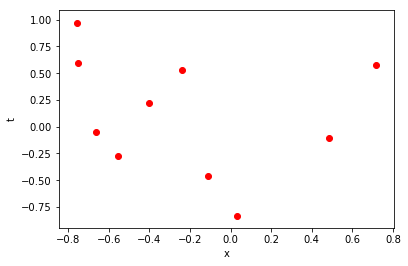

After LT with v=  0.999


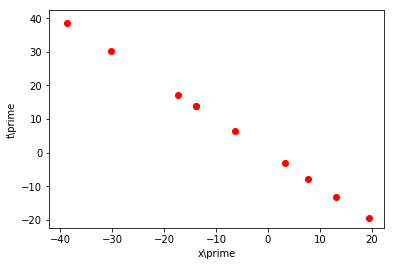

In [34]:
#Choose finite region of spacetime in which to sprinkle to be (x, t) = [[-1,1],[-1,1]]
N_mean = 10
N = int(np.random.normal(N_mean,0.1*N_mean))

x = [random.uniform(-1,1) for i in range(N)]
t = [random.uniform(-1,1) for i in range(N)]
coords = zip(x,t)

v = 0.999

xpr = [xprime(i[0],i[1],v) for i in coords]
tpr = [tprime(i[0],i[1],v) for i in coords]

print "No Boost"
plt.figure()
[plt.scatter(x[i],t[i],color='r') for i in range(N)]
plt.xlabel('x')
plt.ylabel('t')
plt.show()

print "After LT with v= ",v
plt.figure()
[plt.scatter(xpr[i],tpr[i],color='r') for i in range(N)]
plt.xlabel(r'x\prime')
plt.ylabel(r't\prime')
plt.show()

# Task 4
## Proofs
 -  That randomly choosing (u, v) is equivalent to (x, t)
 -  That conditions $u_{1} < u_{2} $ and $v_{1} < v_{2} $ are equivalent to $ |t_{2}-t_{1} | > |x_{2} - x_{1} |$
 - Infinite number of nearest neighbours (non-locality).